## Filter Construction for image smoothing
## Explaining a very mall kernel and it's spread in 3D

In [ ]:
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import convolve

from skimage.color import rgb2gray
from skimage.io import imread, imshow

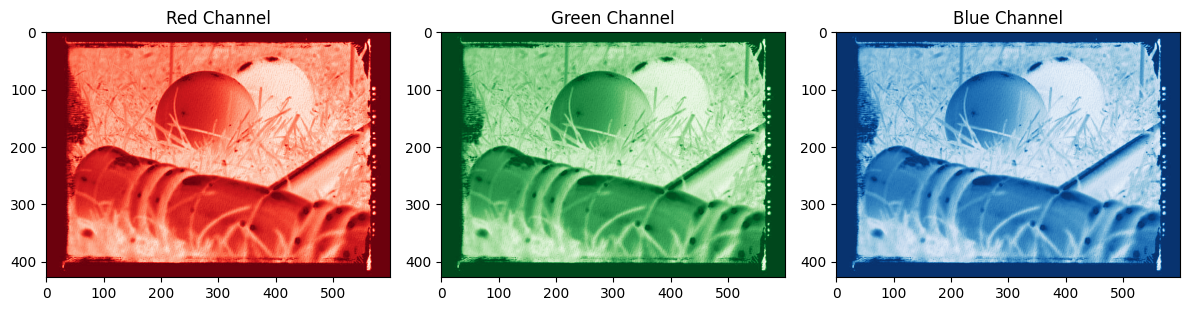

[[252 252 252 ... 252 252 252]
 [252 252 252 ... 252 252 252]
 [252 252 252 ... 252 252 252]
 ...
 [252 252 252 ... 252 252 252]
 [252 252 252 ... 252 252 252]
 [252 252 252 ... 252 252 252]]


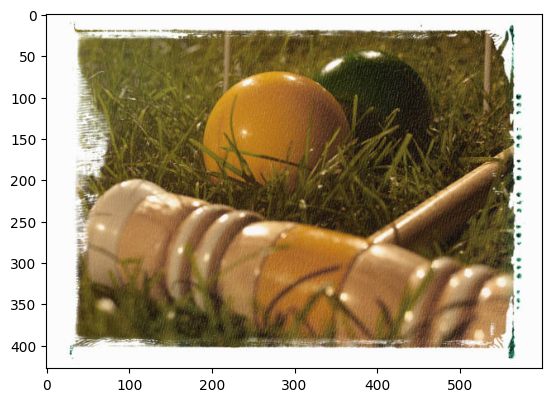

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
image= Image.open("/content/J0387337.JPG")

red_channel, green_channel, blue_channel = image.split()

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.imshow(red_channel, cmap='Reds')
ax1.set_title('Red Channel')

ax2.imshow(red_channel, cmap='Greens')
ax2.set_title('Green Channel')

ax3.imshow(red_channel, cmap='Blues')
ax3.set_title('Blue Channel')

plt.tight_layout()
plt.show()
print(np.array(red_channel))

channels= (red_channel, green_channel, blue_channel)

rgb_image= Image.merge("RGB", channels)
plt.imshow(rgb_image)

Text(0.5, 1.0, 'Red Channel')

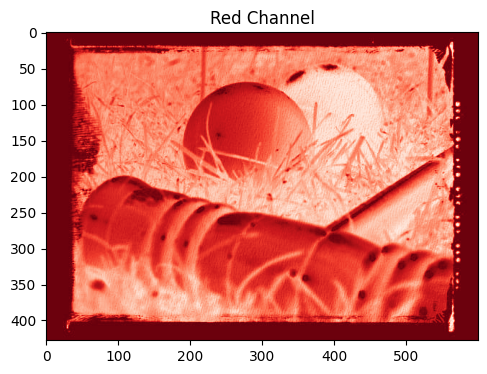

In [ ]:
red_channel
fig, (ax1) = plt.subplots(1,1, figsize=(12,4))

ax1.imshow(red_channel, cmap='Reds')
ax1.set_title('Red Channel')


[[0.0203803  0.02039422 0.02040258 0.02040537 0.02040258 0.02039422
  0.0203803 ]
 [0.02039422 0.02040816 0.02041652 0.02041931 0.02041652 0.02040816
  0.02039422]
 [0.02040258 0.02041652 0.02042489 0.02042768 0.02042489 0.02041652
  0.02040258]
 [0.02040537 0.02041931 0.02042768 0.02043047 0.02042768 0.02041931
  0.02040537]
 [0.02040258 0.02041652 0.02042489 0.02042768 0.02042489 0.02041652
  0.02040258]
 [0.02039422 0.02040816 0.02041652 0.02041931 0.02041652 0.02040816
  0.02039422]
 [0.0203803  0.02039422 0.02040258 0.02040537 0.02040258 0.02039422
  0.0203803 ]]


Text(0.5, 0, 'Magnitude')

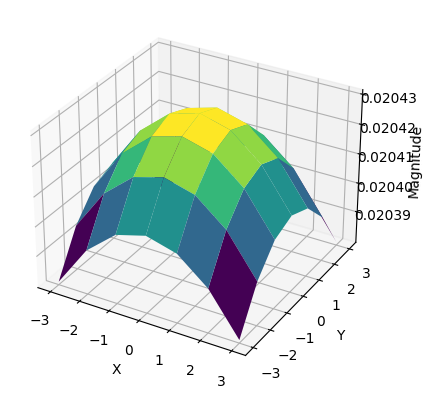

In [ ]:
import numpy as np

sigma= 60.5

kernel= np.zeros((7,7))

x_values= [-3,-2,-1,0,1,2,3]
y_values= [3,2,1,0,-1,-2,-3]

p,q =np.meshgrid(x_values, x_values)

for i,x in enumerate(x_values):
  for j,y in enumerate(y_values):
    kernel[i,j] = (1/(2*np.pi*sigma**2)) * np.exp(-((x)**2 + (y)**2)/(2*(sigma**2)))


kernel = kernel / np.sum(kernel)
print(kernel)
fig = plt.figure()
ax= fig.add_subplot(111, projection='3d')
ax.plot_surface(p,q,kernel,cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Magnitude')

In [ ]:
sigma =0.5
size= int(sigma * 6)+1

kernel = np.zeros((size, size))

x_values= np.linspace(-size//2, size//2, size)
y_values= np.linspace(-size//2, size//2, size)


x,y= np.meshgrid(x_values, y_values)
kernel1= (1/(2*np.pi*sigma**2))* np.exp(-(x**2 + y**2) / (2*sigma**2))

(-0.5, 599.5, 427.5, -0.5)

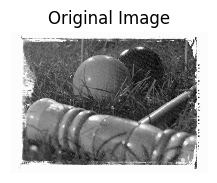

In [ ]:
image = rgb2gray(plt.imread('/content/J0387337.JPG'))
blurred_image= cv2.filter2D(src=image,ddepth=-1,kernel=kernel)

plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

##Separable gaussian filter

In [ ]:
def gaussian_kernel(sigma,size):
  x= np.arange(-size//2, size//2 +1)
  kernel = np.exp(-x**2/(2 * sigma**2))
  return kernel/np.sum(kernel)

In [ ]:
def separable_gaussian_filter(image, sigma):
  size= int(sigma * 6) + 1
  kernel= gaussian_kernel(sigma, size)

  filtered_image = convolve1d(convolve1d(image, kernel, axis=0), kernel, axis)
  return filtered_image

image = rgb2gray(plt.imread('/content/J0387337.JPG'))
sigma= 5.5
filtered_image= separable_gaussian_filter(image, sigma)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

NameError: name 'convolve1d' is not defined